# PROJECT 2 

# WORLD HAPPINESS PREDICTION

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
#loading the csv data file into pandas dataframe

data = pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
#encoding the data
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [18]:
data.replace({'Region': {'Sub-Saharan Africa': 1, 'Central and Eastern Europe': 2, 'Latin America and Caribbean': 3,'Western Europe': 4,'Middle East and Northern Africa':5,'Southeastern Asia': 6,'Southern Asia':7,'Eastern Asia':8,'North America':9,'Australia and New Zealand':10}}, inplace= True)

In [19]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,4,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,4,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,4,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,9,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,1,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,1,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,5,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,1,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


C:\Users\VIV\AppData\Local\Temp\ipykernel_2568\4107106562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Standard Error'])


<Axes: xlabel='Standard Error', ylabel='Density'>

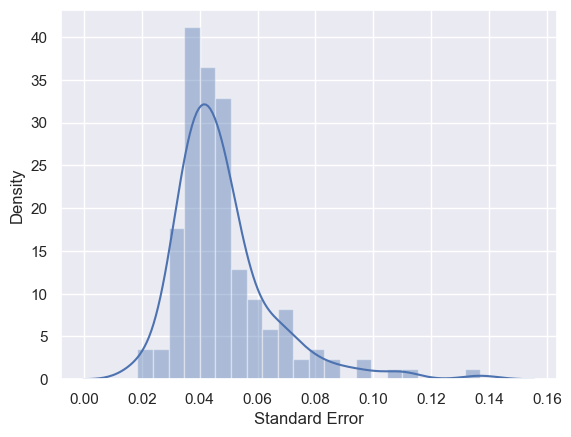

In [20]:
sns.set()
sns.distplot(data['Standard Error'])


<Axes: xlabel='Region', ylabel='count'>

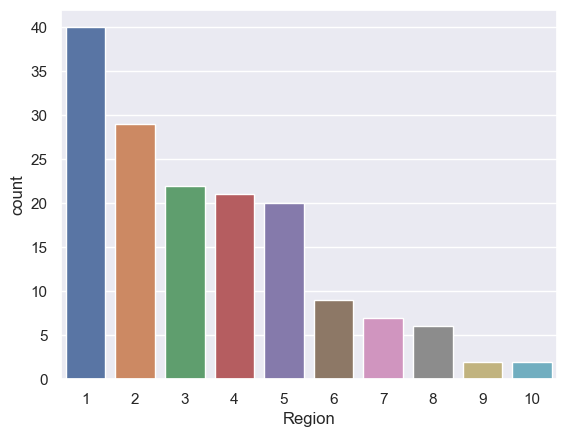

In [21]:
sns.countplot(x='Region' , data = data)

In [22]:
#splitting the data into features and target

x= data.drop(columns=['Country', 'Happiness Score'], axis = 1)
y = data['Happiness Score']

print(x)

     Region  Happiness Rank  Standard Error  Economy (GDP per Capita)  \
0         4               1         0.03411                   1.39651   
1         4               2         0.04884                   1.30232   
2         4               3         0.03328                   1.32548   
3         4               4         0.03880                   1.45900   
4         9               5         0.03553                   1.32629   
..      ...             ...             ...                       ...   
153       1             154         0.03464                   0.22208   
154       1             155         0.03656                   0.28665   
155       5             156         0.05015                   0.66320   
156       1             157         0.08658                   0.01530   
157       1             158         0.06727                   0.20868   

      Family  Health (Life Expectancy)  Freedom  \
0    1.34951                   0.94143  0.66557   
1    1.40223         

In [23]:
print(y)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64


In [24]:
#Model training

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [25]:
print(x.shape,x_train.shape,x_test.shape)

(158, 10) (126, 10) (32, 10)


In [26]:
#Model evaluation

regressor = LinearRegression()


In [27]:
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
train_data_prediction = regressor.predict(x_train)
r2_train = metrics.r2_score(y_train,train_data_prediction)
print('R2 value :', r2_train)

R2 value : 0.9999999383180729


In [34]:
test_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R2 value for testing data is', r2_test)

R2 value for testing data is 0.9999999489274582


In [42]:
#Model Evaluation 


input_data = [22,16,0.046,0.924,1.287,0.6902,0.4049,0.1721,0.1574,3.2001]

input_as_array = np.asarray(input_data)
input_reshaped = input_as_array.reshape(1,-1)

In [43]:
prediction = regressor.predict(input_reshaped)
print(prediction)

[6.83530655]


C:\Users\VIV\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# CONCLUSION 

The model is performing well